<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TimeSeries/TimeSeries-2025/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Глава 1. Введение в Анализ Временных Рядов

Анализ временных рядов представляет собой фундаментальную область статистики и эконометрики, посвящённую изучению данных, собранных и упорядоченных во времени. Эта дисциплина предоставляет инструментарий для понимания динамических процессов, выявления скрытых закономерностей и прогнозирования будущих состояний систем в различных областях — от экономики и финансов до метеорологии и здравоохранения. Данный раздел закладывает концептуальную основу для всестороннего понимания временных рядов, охватывая их формальное определение, классификацию, внутренние компоненты, источники данных, а также методы хранения, подготовки и первоначальной диагностики.



## A. Формальное Определение и Фундаментальные Понятия Временных Рядов

Анализ временных рядов начинается с точного определения его предмета. Временной ряд — это не просто набор данных, а специфическая структура, обладающая уникальными характеристиками, обусловленными его временной природой.

### 1. Определение Временного Ряда как Упорядоченной Последовательности Наблюдений

**Временной ряд** (англ. *time series*) формально определяется как последовательность наблюдений, измерений или точек данных, собранных, записанных или индексированных в последовательные, как правило, равные промежутки времени. Он отражает эволюцию определённого явления или переменной в темпоральном измерении.

Более строго, временной ряд — это упорядоченная во времени числовая последовательность показателей, характеризующих уровень состояния и изменения изучаемого явления.  
Математически временной ряд обозначается как  
$$
\{Y_t\}_{t=1}^N,
$$  
где:
- $Y_t$ — значение наблюдаемой переменной в момент времени $t$,
- $t$ — временной индекс (например, день, месяц, год),
- $N$ — общее количество наблюдений.

**Ключевым аспектом** этого определения является **требование упорядоченности данных**. В отличие от кросс-секционных данных, где порядок наблюдений несущественен, для временных рядов последовательность имеет принципиальное значение. Эта упорядоченность позволяет выявлять временные зависимости, такие как **тренд**, **сезонность**, **цикличность** и **автокорреляция**, которые являются центральными понятиями в анализе временных рядов.

Без сохранения порядка данные теряют свой динамический контекст, что делает невозможным применение специфических методов анализа, учитывающих временные зависимости. Например, если перетасовать временные метки, то невозможно будет обнаружить, например, что температура растёт зимой и падает летом — сезонный паттерн будет утрачен.

Кроме того, акцент на **«числовых показателях»** подразумевает, что изучаемое явление должно быть **количественно измеримым**. Это позволяет применять математические и статистические операции — вычислять средние, дисперсии, строить модели регрессии и т.д. Качественные данные (например, «дождь», «солнечно») могут быть включены в анализ, но только после преобразования в количественные формы (например, через кодирование: 0 — дождь, 1 — солнечно).

Такое строгое определение направляет выбор соответствующих аналитических методологий, подчёркивая необходимость использования методов, которые **явно учитывают временную зависимость** и **количественную природу данных**, а не предполагают независимость и одинаковое распределение наблюдений — как это часто делается в классической статистике.

> **Пример**: Рассмотрим временной ряд ежемесячных продаж компании:
> - Январь: 120 тыс. руб.
> - Февраль: 115 тыс. руб.
> - Март: 130 тыс. руб.
>
> Здесь $Y_1 = 120$, $Y_2 = 115$, $Y_3 = 130$, $N = 3$. Порядок важен: если поменять февраль и март местами, это исказит динамику и может привести к ошибочным выводам о росте или падении продаж.


**Пример.** Последовательность $Y = \{10, 12, 11, 14, 15\}$ может представлять собой ежедневные продажи товара за 5 дней. В данном случае $Y_1 = 10$, $Y_2 = 12$ и так далее.

📝 **Примечание:** Временной ряд является не просто набором чисел, а структурированной последовательностью, где каждое значение неразрывно связано с конкретным моментом времени. Потеря этой упорядоченности делает невозможным анализ временной динамики процесса.

> 💡 Например, если переставить значения ряда $\{10, 12, 11, 14, 15\}$ в порядке $\{15, 10, 14, 12, 11\}$, исчезает информация о росте продаж со временем, и прогнозы станут некорректными.



### 2. Ключевые Элементы: Временная Метка, Значение, Временной Интервал (Частота)

Каждая точка данных во временном ряду состоит из двух фундаментальных элементов:

- **Временная метка (Temporal Index / Timestamp)** — это точное указание момента времени, когда было выполнено наблюдение. Она обеспечивает уникальную идентификацию каждой точки данных и является основой для упорядочивания ряда. Временная метка может быть выражена в различных единицах: дата и время (например, 2023-01-01 12:00), номер периода (например, $t = 1, 2, 3$) или временной объект (в программировании — `datetime`).

- **Значение (Value)** — это количественное измерение переменной в соответствующий момент времени. Оно может быть любым числовым показателем: температура, цена акции, объём продаж, уровень безработицы и т.д.

**Временной интервал (Time Interval)** — это продолжительность между двумя последовательными наблюдениями. Он определяет **частоту (frequency)** или **гранулярность** временного ряда. Частота указывает, как часто собираются данные.

Распространённые частоты:
- **Ежечасная** (hourly) — интервал 1 час,
- **Ежедневная** (daily) — интервал 1 день,
- **Еженедельная** (weekly) — интервал 7 дней,
- **Ежемесячная** (monthly) — интервал около 30 дней,
- **Ежеквартальная** (quarterly) — интервал 3 месяца,
- **Ежегодная** (annual) — интервал 1 год.

> **Пример**: Рассмотрим временной ряд измерений температуры:
> - 1 января 2023 г.: $Y_1 = 5^\circ \text{C}$
> - 2 января 2023 г.: $Y_2 = 4^\circ \text{C}$
> - 3 января 2023 г.: $Y_3 = 6^\circ \text{C}$
>
> Здесь временная метка — дата, значение — температура, временной интервал — 1 день, частота — дневная.

🔔  **Важно**: Временной интервал должен быть **регулярным** для большинства стандартных методов анализа. Если интервалы нерегулярны (например, данные собраны в случайные моменты времени), это требует применения специальных методов (например, интерполяции или моделей для нерегулярных временных рядов).


**Пример: Ежедневные измерения температуры**

| Временная метка       | Значение (°C) |
|------------------------|---------------|
| 1 января 2023 г.       | 5             |
| 2 января 2023 г.       | 4             |
| 3 января 2023 г.       | 6             |

Здесь временной интервал составляет 1 день, а частота ряда — ежедневная.

> 💡 Если бы данные были собраны 1, 3 и 7 января, интервал был бы нерегулярным, что потребовало бы специальных методов обработки.



### 3. Основные Цели и Применение Анализа Временных Рядов

Основные цели анализа временных рядов выходят за рамки простого описания данных. Они включают:

- **Понимание внутренней структуры** и динамики процесса,
- **Выявление скрытых закономерностей** (трендов, сезонности, циклов),
- **Моделирование временных зависимостей** (например, автокорреляции),
- **Прогнозирование будущих значений**,
- **Диагностика аномалий** (выбросов, резких изменений),
- **Оценка влияния внешних факторов** (через модели с экзогенными переменными).

Цель анализа — **обнаружить статистические закономерности и полезные характеристики ряда**, что поможет в понимании природы данных и построении адекватных моделей для будущего прогнозирования.

**Главная цель** анализа временных рядов — **прогнозирование**. Эта способность широко используется в экономике и бизнесе для предсказания будущих тенденций: спроса, цен, доходов, объёмов производства и т.д. Оценка возможного поведения системы позволяет принимать взвешенные управленческие решения, повышать эффективность операций и снижать риски.

> **Пример**: Розничная сеть использует анализ временных рядов, чтобы спрогнозировать спрос на продукты перед праздниками. Это позволяет оптимизировать закупки, избежать переполнения складов и дефицита товаров.

Такой подход устанавливает **прямую причинно-следственную связь**: глубокое понимание данных временных рядов ведёт к **точным прогнозам**, которые, в свою очередь, обеспечивают основу для:
- эффективного стратегического планирования,
- улучшения операционной эффективности,
- минимизации потенциальных рисков.

Таким образом, анализ временных рядов превращается из чисто статистической дисциплины в **критически важный инструмент бизнес-аналитики и стратегического управления**, что объясняет, почему организации активно инвестируют в развитие таких компетенций для проактивного управления в условиях неопределённости.


## B. Классификация Временных Рядов

Временные ряды могут быть классифицированы по различным внутренним свойствам, каждое из которых влияет на выбор соответствующих аналитических методов и подходов к моделированию. Всесторонняя классификация необходима для выбора правильных инструментов анализа.

### 1. По Характеру Изменений: Детерминированные и Стохастические (Недетерминированные) Ряды

####Детерминированный временной ряд (Deterministic Time Series)

Детерминированный временной ряд — это такой ряд, в котором будущие значения **могут быть точно предсказаны** на основе прошлых значений с помощью **известной математической формулы**, без случайных компонентов. Такие ряды полностью предсказуемы.

**Математическая модель** детерминированного ряда может выглядеть, например, так:
$$
Y_t = a + bt + c \cdot \sin(2\pi t / s),
$$
где:
- $a + bt$ — линейный тренд,
- $c \cdot \sin(2\pi t / s)$ — сезонная компонента с периодом $s$.

> **Пример**: Положение маятника в идеальных условиях (без трения и внешних возмущений) можно описать детерминированной формулой. Если известны начальные условия и уравнения движения, можно точно предсказать положение в любой момент времени.

Детерминированные модели часто используются как **теоретические конструкции** или **учебные примеры**, поскольку реальные процессы редко бывают полностью предсказуемыми.

####Стохастический (Недетерминированный) временной ряд (Stochastic / Non-deterministic Time Series)

Стохастический временной ряд содержит **нередуцируемый случайный компонент** («шум»), что делает будущие значения **по своей природе неопределёнными**. Даже при полном знании прошлого, будущее может быть предсказано только с определённой вероятностью.

Математически такой ряд часто представляется в виде:
$$
Y_t = f(t) + \varepsilon_t,
$$
где:
- $f(t)$ — детерминированная часть (например, тренд),
- $\varepsilon_t$ — случайная ошибка (шум), обычно предполагаемая как белый шум: $\varepsilon_t \sim \text{i.i.d.}(0, \sigma^2)$.

> **Пример**: Курс акций — классический пример стохастического ряда. Хотя можно выявить общие тенденции (например, рост компании), краткосрочные изменения зависят от множества непредсказуемых факторов: новостей, настроений рынка, макроэкономических событий и т.д.

**Большинство реальных временных рядов** — в экономике, финансах, метеорологии, биологии — являются **стохастическими**.

#### Значение классификации

Различие между детерминированными и стохастическими рядами имеет **принципиальное значение** для анализа:

- **Детерминированные модели** подходят для идеализированных или контролируемых систем, но **редко адекватны** для описания сложных реальных процессов.
- **Стохастические модели** более реалистичны, но требуют **вероятностного подхода**: оценки параметров, построения доверительных интервалов, анализа автокорреляции и др.

Эта классификация диктует переход от **чисто математического подбора функций** к **статистическому моделированию**, где цель — не предсказать точное значение, а **моделировать распределение будущих значений** и оценить неопределённость прогноза.

> **Пример**: Вместо того чтобы сказать: «Завтра температура будет 15°C», стохастическая модель скажет: «С вероятностью 95% завтрашняя температура будет находиться в интервале от 13°C до 17°C».

Таким образом, стохастический подход **подчёркивает присущие ограничения прогнозирования** в сложных системах и требует от аналитика не только построения модели, но и **оценки её надёжности и неопределённости**.


> 💡 **Значение классификации:** Подавляющее большинство реальных временных рядов являются стохастическими. Это означает, что анализ должен учитывать неопределённость, а модели — быть вероятностными. Переход от детерминированных к стохастическим моделям отражает переход от идеализированных конструкций к реалистичным подходам, учитывающим шум, внешние возмущения и ограниченность информации.



### 2. По Временной Структуре: Непрерывные и Дискретные (Моментные и Интервальные) Ряды

Классификация временных рядов по временной структуре основывается на том, как именно происходит измерение процесса во времени — **непрерывно** или **дискретно**. Этот критерий имеет важное значение для выбора методов сбора, хранения и анализа данных.

####Непрерывный временной ряд (Continuous Time Series)

Непрерывный временной ряд — это такой ряд, в котором значение переменной **определено в любой момент времени** из заданного интервала. Это означает, что процесс наблюдается **непрерывно**, и теоретически можно получить измерение в произвольно малый промежуток времени.

Формально такой ряд описывается функцией $Y(t)$, где $t \in \mathbb{R}$ — непрерывная временная переменная.

> **Примеры**:
> - Электрокардиограмма (ЭКГ), где электрическая активность сердца записывается непрерывно.
> - Показания датчика температуры в промышленной печи, измеряющего температуру каждую миллисекунду.
> - Котировки акций в режиме реального времени на высокочастотных торгах (HFT).

Несмотря на то, что физический процесс может быть непрерывным, его **реальная регистрация** почти всегда происходит в дискретные моменты времени (с высокой частотой), что приводит к **дискретизации** непрерывного сигнала.

####Дискретный временной ряд (Discrete Time Series)

Дискретный временной ряд — это ряд, значения которого фиксируются **только в определённые, отдельные моменты времени**, обычно с регулярным интервалом. Такие ряды описываются последовательностью $\{Y_t\}_{t=1}^N$, где $t$ принимает целочисленные значения (например, $t = 1, 2, 3, \dots$).

Дискретные временные ряды являются **наиболее распространёнными** в практическом анализе, поскольку подавляющее большинство данных собирается с определённой периодичностью (ежедневно, ежемесячно и т.д.).

Они подразделяются на два основных типа:

##### ○ Моментные временные ряды (Moment Time Series)

Моментные ряды отражают **состояние системы в конкретный момент времени**. Значение показывает уровень переменной **в определённый мгновенный момент**.

> **Примеры**:
> - Цена закрытия акции на бирже в 17:00.
> - Уровень воды в реке на 08:00 утра.
> - Численность населения страны на 1 января каждого года.

Такие данные **не суммируются** во времени: нельзя сложить численность населения на 1 января 2023 и 1 января 2024, чтобы получить что-то осмысленное.

##### ○ Интервальные временные ряды (Interval Time Series)

Интервальные ряды отражают **суммарное значение или усреднённый показатель за определённый временной интервал**. Значение показывает **накопленный объём** или **среднее** за период.

> **Примеры**:
> - Ежедневный объём дождевых осадков (суммарно за 24 часа).
> - Ежемесячный объём продаж.
> - Квартальный ВВП.
> - Средняя температура за месяц.

Интервальные данные **можно суммировать** или агрегировать: например, сумма ежемесячных продаж даёт годовой объём.

#### Практическое значение классификации

Как отмечается в источниках, **«дискретные временные ряды легче подвергаются математической обработке»**. Это связано с тем, что большинство статистических и эконометрических моделей (например, ARIMA, VAR, экспоненциальное сглаживание) разработаны именно для дискретных данных.

Хотя многие процессы по своей природе непрерывны, **их цифровая фиксация требует дискретизации** — выборки с определённой частотой. Обратный процесс — **интерполяция** или **сглаживание** — позволяет приблизительно восстановить непрерывное поведение по дискретным данным.

> **Пример**: Датчик температуры измеряет значение каждые 5 минут. Это дискретный моментный ряд. С помощью интерполяции (например, линейной или кубической) можно оценить температуру в промежуточные моменты и приблизить непрерывную кривую.

Выбор между **моментными** и **интервальными** данными **критически важен** для корректной интерпретации и моделирования. Например:
- Прогноз **моментного** ряда (например, цена акции) отражает ожидаемое состояние.
- Прогноз **интервального** ряда (например, месячные продажи) — ожидаемый объём.



### 3. По Количеству Переменных: Одномерные (Унивариантные) и Многомерные (Мультивариантные) Ряды

Эта классификация определяет, сколько переменных анализируется одновременно.

####Одномерный (Унивариантный) временной ряд (Univariate Time Series)

Одномерный временной ряд представляет собой последовательность наблюдений **одной переменной**, измеренной во времени.

Математически: $\{Y_t\}_{t=1}^N$, где $Y_t \in \mathbb{R}$.

> **Примеры**:
> - Ежедневная цена закрытия акций компании Apple.
> - Ежемесячный уровень инфляции в стране.
> - Годовой объём добычи нефти.

Анализ сосредоточен **исключительно на внутренней динамике** этой переменной: тренде, сезонности, автокорреляции и т.д. Модели, используемые для таких рядов, включают AR, MA, ARMA, ARIMA, экспоненциальное сглаживание и др.

####Многомерный (Мультивариантный) временной ряд (Multivariate Time Series)

Многомерный временной ряд — это набор **одновременных наблюдений нескольких переменных**, измеренных во времени. Он представляет собой вектор значений в каждый момент времени.

Математически: $\{\mathbf{Y}_t\}_{t=1}^N$, где $\mathbf{Y}_t = (Y_{1t}, Y_{2t}, \dots, Y_{kt})^\top \in \mathbb{R}^k$, $k > 1$.

> **Примеры**:
> - Ежедневные цены открытия, закрытия, максимума и минимума акций (четыре переменные).
> - Показания метеостанции: температура, влажность, давление, скорость ветра.
> - Макроэкономические индикаторы: ВВП, инфляция, безработица, процентная ставка.

Анализ должен учитывать:
- Внутреннюю динамику каждого ряда,
- **Межвременные корреляции** между переменными,
- **Опережающие и отстающие связи** (например, изменение процентной ставки может повлиять на ВВП с лагом).

> **Пример**: Рост потребительских расходов может опережать рост ВВП на один-два квартала. Это можно выявить только в многомерном анализе.


#### Аналитическая сложность

Переход от одномерного к многомерному анализу **существенно усложняет** задачу:
- Растёт число параметров.
- Требуется больше данных.
- Возникает проблема мультиколлинеарности.
- Необходимо учитывать **динамические взаимозависимости**.


> 💡 **Ключевое различие:**  
> - **Одномерный анализ** моделирует внутренние временные зависимости.  
> - **Многомерный анализ** дополнительно учитывает **межпеременные зависимости**, включая корреляции, опережающе-отстающие связи (lead-lag), и причинные отношения (например, через тест Грейнджера).  


Для этого используются более сложные модели:
- **VAR (Vector Autoregression)** — модель векторной авторегрессии,
- **VECM (Vector Error Correction Model)** — модель коррекции ошибок,
- **Динамические факторные модели**,
- **Многоуровневые модели** и **нейронные сети**.

Выбор между одномерным и многомерным подходом зависит от **цели анализа**:
- Если интересует **только одна переменная**, и внешние факторы не важны — достаточно одномерного подхода.
- Если необходимо **понять влияние нескольких факторов** — требуется многомерный анализ.



### 4. По Статистическим Свойствам: Стационарные и Нестационарные Ряды (Краткое Упоминание)

Эта классификация играет **ключевую роль** в выборе моделей и валидности статистических выводов.

####Стационарный временной ряд (Stationary Time Series)

Стационарный временной ряд — это ряд, **статистические свойства которого не меняются со временем**. Это означает, что:
- Математическое ожидание $\mathbb{E}[Y_t] = \mu$ — постоянно,
- Дисперсия $\text{Var}(Y_t) = \sigma^2$ — постоянна,
- Ковариация $\text{Cov}(Y_t, Y_{t+k})$ зависит только от лага $k$, но не от времени $t$.

> **Пример**: Белый шум $\varepsilon_t \sim \text{i.i.d.}(0, \sigma^2)$ — простейший пример стационарного процесса.

Стационарность крайне желательна, потому что:
- Упрощает статистический вывод,
- Позволяет применять классические модели (AR, MA, ARMA),
- Обеспечивает стабильность параметров модели.

####Нестационарный временной ряд (Non-stationary Time Series)

Нестационарный ряд — это ряд, **статистические свойства которого изменяются во времени**. Чаще всего это проявляется в:
- **Тренде** (постоянный рост/падение),
- **Сезонности** (периодические изменения),
- **Изменяющейся дисперсии** (гетероскедастичность),
- **Разрыве дисперсии** (структурные сдвиги).

> **Примеры**:
> - Курс валюты (имеет тренд и волатильность),
> - ВВП страны (растёт со временем),
> - Объём продаж интернет-магазина (сезонный и растущий).

Как отмечается: **«Если временной ряд является стационарным, то его можно легко анализировать и прогнозировать»**. Однако большинство реальных временных рядов изначально **нестационарны**.

#### Значение для анализа

Многие классические модели (AR, MA, ARMA) **требуют стационарности**. Применение их к нестационарным данным может привести к **ложной регрессии** — когда модель показывает высокую корреляцию, но она не имеет реального смысла.

Чтобы сделать ряд стационарным, применяют:
- **Дифференцирование** (например, $\Delta Y_t = Y_t - Y_{t-1}$),
- **Логарифмическое преобразование**,
- **Удаление тренда** (детрендирование),
- **Сезонное дифференцирование**.

Оценка стационарности проводится с помощью:
- Графического анализа,
- Тестов (ADF, KPSS, PP),
- Анализа автокорреляционной функции (ACF).

Таким образом, **проверка и достижение стационарности** — фундаментальный шаг в анализе временных рядов, напрямую влияющий на **валидность, надёжность и точность** моделей и прогнозов.


**Пример:**  
Ежемесячные продажи, растущие со временем: $ Y_t = 100 + 2t + \varepsilon_t $ — нестационарен.

> 💡 **Критическое значение:**  
> Большинство классических моделей (AR, MA, ARMA) требуют **стационарности**.  
> Нестационарные ряды могут приводить к **ложной регрессии** — статистически значимым, но бессмысленным связям.  
> Для устранения нестационарности применяются:
> - **Дифференцирование** (в ARIMA-моделях),
> - **Трансформации** (логарифмирование, нормализация),
> - **Удаление тр


> **Примечание**: Подробное обсуждение стационарности, тестов и методов преобразования будет представлено в отдельном разделе.



### 5. Прочие Классификации

Помимо основных критериев, временные ряды можно классифицировать и по другим признакам.

####Полные и Неполные Ряды (Complete and Incomplete Series)

- **Полный временной ряд** — содержит данные за **полный цикл** (например, 12 месяцев для годовой сезонности, 7 дней для недельной). Это позволяет корректно выявить и смоделировать сезонные компоненты.
- **Неполный временной ряд** — не охватывает полный цикл, что затрудняет идентификацию сезонности.

> **Пример**: Если у вас есть данные о продажах только за январь–июнь, вы не можете надёжно определить годовой сезонный паттерн.

#### Классификация по порождающим моделям (Classification by Generating Models)

Это **теоретическая классификация**, основанная на предполагаемом стохастическом процессе, породившем данные:
- **AR(p)** — авторегрессионный процесс порядка $p$,
- **MA(q)** — процесс скользящего среднего порядка $q$,
- **ARMA(p,q)** — комбинация AR и MA,
- **ARIMA**, **SARIMA**, **GARCH** и др.

Такая классификация используется при **моделировании и выборе спецификации модели**, но требует предварительного анализа данных.



## C. Компоненты Временных Рядов: Декомпозиционный Подход

Многие временные ряды можно представить как **сумму или произведение нескольких компонент**, каждая из которых отражает определённый тип вариации. Такой подход называется **декомпозицией временного ряда**.

### Общая структура

Наблюдаемое значение $Y_t$ в момент времени $t$ можно представить как комбинацию:
- $T_t$ — трендовая компонента,
- $S_t$ — сезонная компонента,
- $C_t$ — циклическая компонента,
- $E_t$ — случайная (остаточная) компонента.

### Две основные модели декомпозиции:

#### 1. Аддитивная модель (Additive Model)

$$
Y_t = T_t + S_t + C_t + E_t
$$

Применяется, когда **амплитуда сезонных и случайных колебаний** остаётся **примерно постоянной** независимо от уровня тренда.

> **Пример**: Ежемесячные расходы на коммунальные услуги в многоквартирном доме. Сезонные колебания (зимой больше, летом меньше) имеют примерно одинаковую амплитуду, даже если общий уровень расходов растёт.

#### 2. Мультипликативная модель (Multiplicative Model)

$$
Y_t = T_t \times S_t \times C_t \times E_t
$$

Применяется, когда **амплитуда колебаний пропорциональна уровню тренда** — то есть чем выше тренд, тем сильнее сезонные и случайные отклонения.

> **Пример**: Продажи смартфонов. При росте объёмов продаж сезонный всплеск (например, перед Новым годом) становится **абсолютно больше**, хотя относительная доля остаётся примерно той же.

> **Примечание**: Циклическая компонента $C_t$ в мультипликативной модели часто **не выделяется явно**, особенно если её влияние сложно отделить от тренда. В таких случаях модель упрощается до $Y_t = T_t \times S_t \times E_t$.



### 1. Тренд (Trend): Долгосрочная Систематическая Тенденция

Тренд — это **долгосрочное систематическое движение** временного ряда, отражающее устойчивое изменение уровня явления.

- **Восходящий тренд**: рост (например, ВВП, численность населения),
- **Нисходящий тренд**: падение (например, вымирание видов),
- **Горизонтальный тренд**: стабильность.

Тренд может быть описан различными функциями:
- Линейный: $T_t = a + bt$
- Экспоненциальный: $T_t = a \cdot e^{bt}$
- Полиномиальный: $T_t = a + bt + ct^2$

> **Пример**: Устойчивый рост средней глобальной температуры на 0.2°C в десятилетие — пример линейного тренда. Рост числа пользователей социальной сети с ускорением — пример экспоненциального тренда.



### 2. Сезонность (Seasonality): Регулярные Периодические Колебания

Сезонность — это **регулярные, предсказуемые колебания**, повторяющиеся с **фиксированным периодом** (день, неделя, месяц, квартал, год).

Вызывается календарными факторами:
- Время суток (пик энергопотребления в 18:00),
- День недели (высокие продажи в выходные),
- Месяц (рост туристических поездок летом),
- Праздники (рост продаж перед Новым годом).

> **Пример**: Спрос на кондиционеры резко возрастает каждый июнь в жарких регионах — это **ежегодная сезонность**.



### 3. Цикличность (Cycles): Нерегулярные, Долгосрочные Колебания

Цикличность — это **долгосрочные колебания**, не привязанные к календарю, с **нерегулярным периодом**, часто превышающим один год.

Связана с экономическими, социальными или природными циклами:
- Экономические циклы (подъёмы и спады),
- Циклы солнечной активности (11 лет),
- Демографические волны.

Математически чистый цикл можно описать как:
$$
x(t) = \rho \cos(\omega t - \theta)
$$
где:
- $\rho$ — амплитуда,
- $\omega$ — угловая частота,
- $\theta$ — фаза,
- период цикла: $T = \frac{2\pi}{\omega}$.

> **Пример**: ВВП страны колеблется с периодом 5–7 лет в зависимости от фазы экономического цикла.

#### Отличие от сезонности:

| Характеристика       | Сезонность                     | Цикличность                     |
|----------------------|--------------------------------|----------------------------------|
| Период               | Фиксированный (1 год, 1 неделя) | Нерегулярный (2–10 лет)         |
| Причина              | Календарь, климат               | Экономика, общество              |
| Предсказуемость      | Высокая                        | Умеренная                        |
| Длительность         | Короткая (до года)             | Долгая (от 2 лет)                |

#### Методологические различия

Как отмечается: **«алгоритм нахождения сезонной и циклической не может совпадать»**.

- Для **сезонности** эффективны методы **скользящего среднего** и **сезонного сглаживания**.
- Для **циклов** требуются **спектральные методы**, **фильтры Ходрика–Прескотта**, **вейвлет-анализ** или **модели с лагами**.

Скользящее среднее не подходит для циклов, так как предполагает, что соседние точки близки — что неверно для долгосрочных колебаний.



### 4. Случайные Колебания (Random or Irregular Fluctuations / Residuals)

Случайные колебания — это **непредсказуемая часть** временного ряда, оставшаяся после удаления тренда, сезонности и циклов.

Они включают:
- Шум измерений,
- Случайные события (стихийные бедствия, политические кризисы),
- Неучтённые факторы.

Остаточная компонента $E_t$ должна быть **белым шумом**:
- $\mathbb{E}[E_t] = 0$,
- $\text{Var}(E_t) = \sigma^2$,
- $\text{Cov}(E_t, E_{t+k}) = 0$ при $k \neq 0$.

Анализ остатков позволяет:
- Оценить **адекватность модели**,
- Проверить, нет ли **автокорреляции** (что указывает на пропущенные паттерны),
- Выявить **выбросы**.

> **Пример**: После удаления тренда и сезонности из данных о продажах, остатки должны быть случайными. Если они показывают паттерн — значит, модель упускает важную компоненту.




## D. Источники Данных Временных Рядов

Источники данных временных рядов чрезвычайно разнообразны и охватывают практически все сферы человеческой деятельности, от экономики и промышленности до здравоохранения и природных наук. Эти данные возникают как результат **систематического измерения или наблюдения** за динамическими процессами, что делает их идеальными кандидатами для анализа временных рядов. Понимание природы и происхождения таких данных помогает не только в выборе подходящих методов сбора, хранения и предварительной обработки, но и в интерпретации результатов анализа, а также в формулировке адекватных моделей.

Ниже представлены основные категории источников временных рядов, сопровождаемые конкретными примерами и пояснениями.

### 1. Экономические и Финансовые Данные

Экономические и финансовые временные ряды являются одними из **наиболее часто анализируемых** в статистике, эконометрике и финансовой аналитике. Они характеризуются высокой частотой, доступностью и значительной волатильностью, что делает их важными для прогнозирования, принятия инвестиционных решений и макроэкономического планирования.

####Валовой внутренний продукт (ВВП)
Квартальные или годовые данные о ВВП отражают **объем экономической активности** страны за определённый период. Это интервальный временной ряд, поскольку показывает **суммарное производство** за квартал или год.

> **Пример**:
> - Q1 2023: 1200 млрд долларов США,
> - Q2 2023: 1250 млрд долларов США,
> - Q3 2023: 1230 млрд долларов США.
>
> Такой ряд может демонстрировать **долгосрочный тренд роста**, **квартальные колебания** (сезонность) и **циклические спады**, связанные с рецессиями.

####Индексы фондовых рынков
Ежедневные, ежечасные или даже **внутридневные** данные по индексам, таким как **S&P 500**, **Dow Jones Industrial Average** или **NASDAQ**, отражают среднее изменение цен акций компаний, входящих в индекс. Это моментные временные ряды, поскольку показывают **уровень индекса в конкретный момент времени** (например, при закрытии торгов).

> **Особенность**: Эти ряды часто демонстрируют **высокую волатильность**, **кластеризацию волатильности** (GARCH-эффект) и **нестационарность**, что требует специальных моделей (например, GARCH, ARIMA).

####Курсы валют
Ежедневные или внутридневные курсы обмена валют (например, USD/EUR, GBP/JPY) используются для анализа **валютных рисков**, **международной торговли** и **макроэкономической политики**.

> **Пример**: Курс USD/EUR на 10:00: 1.085; на 11:00: 1.087 — типичный пример высокочастотного временного ряда.

####Цены на акции
Цены на отдельные акции (например, Apple, Tesla) собираются ежедневно (цена закрытия), ежечасно или в режиме реального времени. Это **моментные ряды**, отражающие **рыночную оценку компании** в каждый момент времени.

> **Применение**: Используются в алгоритмической торговле, техническом анализе, оценке инвестиционных портфелей.



### 2. Метеорологические Данные

Метеорологические временные ряды — классический пример данных с **сильной сезонностью**, **цикличностью** и **стохастической природой**. Они собираются с высокой частотой и используются в климатологии, сельском хозяйстве, энергетике и логистике.

####Температура
Ежедневные, ежечасные или даже **минутные** измерения температуры воздуха, воды или почвы. Это моментный временной ряд.

> **Пример**: Температура в Мельбурне:
> - 08:00: 14°C,
> - 12:00: 22°C,
> - 18:00: 18°C.

Такой ряд может демонстрировать **суточную**, **недельную** и **годовую сезонность**, а также **долгосрочный тренд**, связанный с изменением климата.

####Осадки
Ежедневное или ежемесячное **суммарное количество осадков** (в мм) — интервальный временной ряд.

> **Пример**:
> - Январь 2023: 50 мм,
> - Февраль 2023: 40 мм,
> - Март 2023: 60 мм.

Осадки часто имеют **асимметричное распределение** (многие нули, редкие сильные дожди), что требует специальных моделей (например, с учётом нулей — zero-inflated models).

####Скорость ветра
Ежечасные или ежеминутные измерения скорости ветра (в м/с или км/ч). Используются в энергетике (ветрогенерация), авиации, мореплавании.

> **Особенность**: Часто демонстрирует **высокую изменчивость** и **нелинейные паттерны**.



### 3. Социальные Данные

Социальные временные ряды отражают **изменения в обществе** и используются для разработки политики, демографического прогнозирования и социальной аналитики.

####Уровень безработицы
Ежемесячные или квартальные данные о доле безработного населения в экономически активной части населения. Это интервальный показатель, хотя часто интерпретируется как моментный.

> **Пример**:
> - Январь 2023: 5%,
> - Февраль 2023: 4.8%,
> - Март 2023: 5.2%.

Ряд может демонстрировать **экономическую цикличность** — рост безработицы в периоды рецессии, снижение в периоды подъёма.

####Демографические показатели
Ежегодные данные о рождаемости, смертности, миграции, средней продолжительности жизни. Это интервальные временные ряды.

> **Пример**: Ежегодное число рождений в стране:
> - 2020: 1 200 000,
> - 2021: 1 180 000,
> - 2022: 1 150 000.

Часто анализируются в сочетании с другими показателями для выявления **демографических тенденций** (например, старение населения).



### 4. Промышленные Данные

Промышленные временные ряды отражают **производственные процессы**, **потребление ресурсов** и **логистику**. Они критически важны для управления цепочками поставок, оптимизации производства и прогнозирования спроса.

####Объёмы производства
Ежемесячные или квартальные данные об объёме выпускаемой продукции (в штуках, тоннах, денежном выражении).

> **Пример**:
> - Январь 2023: 10 000 автомобилей,
> - Февраль 2023: 10 500 автомобилей,
> - Март 2023: 11 000 автомобилей.

Такой ряд может показывать **сезонность** (например, снижение в январе после праздников), **тренд роста** и **влияние внешних факторов** (например, дефицит чипов).

####Продажи
Ежедневные, еженедельные или ежемесячные данные о продажах товаров или услуг. Ключевой показатель для бизнеса.

> **Особенность**: Часто имеет **сильную сезонность** (праздники, распродажи) и **всплески**, вызванные маркетинговыми кампаниями.

####Запасы
Данные о количестве товаров на складах (в штуках, объеме, стоимости). Могут быть моментными (например, уровень запасов на 1-е число каждого месяца).

> **Применение**: Используются в **управлении запасами**, **прогнозировании дефицита**, **оптимизации логистики**.



### 5. Прочие Источники

Помимо перечисленных, существует множество других источников временных рядов, особенно в условиях цифровизации и развития технологий.

####Данные датчиков (IoT, промышленные и медицинские)
Показания сенсоров в реальном времени: температура двигателя, давление в трубопроводе, ЭКГ, частота сердечных сокращений.

> **Пример**: Пульс пациента, измеряемый каждые 5 секунд — высокочастотный временной ряд с **биологической цикличностью**.

####Данные о трафике
- Количество посетителей веб-сайта по часам,
- Объём сетевого трафика,
- Трафик в приложениях.

> **Пример**: Число посещений сайта интернет-магазина:
> - Понедельник 9:00: 120,
> - Понедельник 12:00: 450,
> - Суббота 20:00: 800.

Часто демонстрирует **суточную и недельную сезонность**.

####Медицинские данные
- Артериальное давление,
- Уровень глюкозы в крови,
- Концентрация кислорода в крови (SpO₂).

> **Применение**: Мониторинг состояния пациентов, диагностика заболеваний, персонализированная медицина.

####Данные об окружающей среде
- Уровень загрязнения воздуха (PM2.5, CO, NO₂),
- Концентрация озона,
- Уровень шума.

> **Пример**: Данные о концентрации PM2.5 в городе:
> - 1 января: 35 мкг/м³,
> - 2 января: 42 мкг/м³,
> - 3 января: 50 мкг/м³ (пик из-за тумана и транспорта).

Используются в экологии, городском планировании, здравоохранении.



## E. Примеры Временных Рядов и Их Визуальная Характеристика

**Визуализация** является **первым и одним из наиболее информативных шагов** в анализе временных рядов. Графическое представление данных позволяет быстро и интуитивно выявить ключевые характеристики: **тренд**, **сезонность**, **цикличность**, **аномалии (выбросы)** и **взаимосвязи между переменными**. Это критически важный этап **первичной диагностики**, предшествующий формальному моделированию.

Ниже рассмотрены три характерных примера временных рядов, иллюстрирующих разнообразие структур и паттернов.



### 1. Ежемесячные продажи антидиабетических лекарств в Австралии (июль 1991 – июнь 2008)

На графике, представляющем ежемесячные продажи антидиабетических препаратов, можно наблюдать следующие ключевые особенности:

- **Ярко выраженный восходящий тренд**: объём продаж стабильно растёт на протяжении более чем 17 лет. При этом тренд, вероятно, **нелинейный** — рост ускоряется в последние годы, что может указывать на увеличение числа случаев диабета, рост осведомлённости населения или расширение доступа к лечению.
  
- **Выраженная сезонность**: в каждом году наблюдается **регулярное колебание** продаж. Например, продажи могут возрастать в начале года (после каникул, когда люди возвращаются к лечению) или в осенне-зимний период (связано с изменением образа жизни, питанием, снижением физической активности).

> **Аналитическое значение**: Такой ряд требует **мультипликативной модели декомпозиции**, так как амплитуда сезонных колебаний, скорее всего, увеличивается вместе с ростом тренда. Также может потребоваться **логарифмическое преобразование** для стабилизации дисперсии.

In [ ]:
#Basic importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

ts = pd.read_parquet("hf://datasets/rajistics/electricity_demand/data/train-00000-of-00001.parquet")

plt.figure(figsize=(16,6))
plt.plot(ts["__index_level_0__"],ts["Demand"])
plt.xlabel("Time")
plt.ylabel("Demand")
plt.title("Electricity Demand")





### 2. Максимальный спрос на электричество в штате Виктория, Австралия (30-минутные интервалы, 10 января 2000 – 115 дней)

Этот временной ряд демонстрирует **множественную сезонность** — одновременное наличие нескольких периодических компонент.

- **Суточная сезонность**: потребление электроэнергии значительно возрастает в утренние (6:00–9:00) и вечерние (17:00–21:00) часы, когда люди включают свет, отопление, кухонные приборы и т.д. Ночью спрос падает.
  
- **Недельная сезонность**: в будние дни спрос выше, чем в выходные, из-за работы предприятий, офисов, транспорта. В субботу и воскресенье наблюдается более равномерное и низкое потребление.

- **Потенциальная годовая сезонность**: если бы данные охватывали несколько лет, можно было бы выявить **рост спроса в летние месяцы** из-за использования кондиционеров и **в зимние месяцы** — из-за отопления.

> **Аналитическое значение**: Для анализа таких данных требуются **модели, способные учитывать множественную сезонность**, например:
> - **TBATS** (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, Seasonal components),
> - **BATS**,
> - **Модели с Фурье-членами**,
> - **Глубокие нейронные сети** (например, LSTM с внешними признаками).



### 3. Иллюстрация визуализации временных рядов с использованием программного кода

Ниже приведён пример кода на языке **Python**, демонстрирующий стандартный процесс **загрузки и визуализации многомерного временного ряда**. Такие практики являются основой для первичного анализа данных.

```python
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('complete_dataset.csv')
data['datetime'] = pd.to_datetime(data['datetime'])  # Преобразование в формат даты-времени
data.set_index('datetime', inplace=True)

# Визуализация
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Спрос на электроэнергию
axes[0].plot(data['demand'], color='blue', linewidth=0.8)
axes[0].set_title('Динамика спроса на электроэнергию')
axes[0].set_ylabel('Спрос (МВт)')

# 2. Рыночная расчетная цена (RRP)
axes[1].plot(data['rrp'], color='red', linewidth=0.8)
axes[1].set_title('Изменение рыночной расчетной цены (RRP)')
axes[1].set_ylabel('Цена (AUD/МВт·ч)')

# 3. Погодные условия
axes[2].plot(data['temp_min'], label='Мин. температура', color='navy', linestyle='--')
axes[2].plot(data['temp_max'], label='Макс. температура', color='orange', linestyle='--')
axes[2].bar(data.index, data['rainfall'], label='Осадки', color='lightblue', alpha=0.6)
axes[2].set_title('Погодные условия')
axes[2].set_ylabel('Температура (°C), Осадки (мм)')
axes[2].legend()

plt.xlabel('Время')
plt.tight_layout()
plt.show()
```

#### Пояснение к коду:

- **Загрузка данных**: Файл `complete_dataset.csv` содержит временные ряды спроса, цен, температур и осадков. Колонка `datetime` преобразуется в тип `datetime` для корректного индексирования.
- **Визуализация спроса**: Первый график показывает **динамику потребления электроэнергии**. На нём можно увидеть **суточные пики**, **выбросы** (например, из-за экстремальной погоды) и **долгосрочные изменения**.
- **Визуализация RRP (рыночная расчетная цена)**: Второй график отражает **волатильность цен** на энергорынке. Часто наблюдаются **резкие скачки** (например, при дефиците предложения), что важно для анализа рисков.
- **Визуализация погодных условий**: Третий график объединяет **температуру (линии)** и **осадки (столбцы)**. Совместный анализ позволяет исследовать, например:
  - Как **высокая температура** влияет на **спрос** (кондиционеры),
  - Как **дождь** влияет на **выработку солнечной энергии**.

#### Значение визуализации

Эти графики служат **мощным инструментом первичной диагностики**. Они позволяют:
- Быстро выявить **тренды**, **сезонность**, **аномалии**,
- Обнаружить **визуальные корреляции** (например, между температурой и спросом),
- Принять решение о необходимости **трансформации данных** (логарифмирование, дифференцирование),
- Выбрать **подходящую модель** (например, с учётом температуры как экзогенной переменной).

> **Важно**: Визуальный анализ **не заменяет статистических тестов**, но является **незаменимым первым шагом**, помогающим сформулировать гипотезы и направить дальнейший анализ.





## F. Хранение Временных Рядов: Оптимизация и Управление

Эффективное хранение данных временных рядов играет ключевую роль в их анализе, прогнозировании и использовании для принятия решений в таких областях, как финансы, метеорология, здравоохранение, промышленность и информационные технологии. В связи с высокой частотой сбора данных и их большим объёмом, традиционные подходы к хранению часто оказываются недостаточно эффективными. Этот раздел рассматривает основные аспекты хранения временных рядов, включая **структуру данных**, **методы сжатия**, **индексацию**, **безопасность** и **специализированные системы управления базами данных (TSDB)**.

### 1. Формат Данных Временных Рядов

Временные ряды, как правило, представляются в виде **пар (временная метка, значение)**, где каждая запись содержит:
- **Временную метку (timestamp)** — момент времени, в который было сделано наблюдение,
- **Значение (value)** — числовое измерение переменной в этот момент.

Такой формат позволяет хранить и структурировать данные в удобной для анализа форме, обеспечивая **упорядоченность** и **связь со временем**.

> **Пример**: Ежечасные измерения температуры:

| Время                   | Температура (°C) |
|-------------------------|------------------|
| 2023-01-01 00:00:00     | 5                |
| 2023-01-01 01:00:00     | 4                |
| 2023-01-01 02:00:00     | 6                |
| ...                     | ...              |

Это представление является стандартным и используется как в реляционных базах данных, так и в специализированных системах хранения временных рядов.



### 2. Структура Данных и Таблицы в Базах Данных

Для хранения временных рядов в реляционных базах данных (например, PostgreSQL, MySQL) часто используется **табличная структура**, где каждая строка соответствует одному наблюдению, а столбцы содержат временные метки и значения.

> **Пример структуры таблицы для хранения температурных данных**:

```sql
CREATE TABLE temperature (
    timestamp TIMESTAMP WITH TIME ZONE,
    temperature FLOAT,
    sensor_id VARCHAR(50),
    location VARCHAR(100)
);
```

- `timestamp` — временная метка с учётом временной зоны (рекомендуется использовать `TIMESTAMP WITH TIME ZONE` для корректной работы с глобальными данными),
- `temperature` — числовое значение температуры (с плавающей точкой),
- `sensor_id`, `location` — дополнительные атрибуты для идентификации источника данных.

Такая структура легко масштабируется и позволяет выполнять сложные SQL-запросы, включая фильтрацию по времени, агрегацию и соединение с другими таблицами.



### 3. Частота Наблюдений

Частота наблюдений — это интервал между последовательными измерениями. Она определяет **гранулярность** временного ряда и влияет на объём хранимых данных, производительность и аналитические возможности.

Распространённые частоты:
- **Секундная**, **миллисекундная** — датчики, финансовые рынки,
- **Минутная**, **часовая** — мониторинг систем, погода,
- **Ежедневная**, **ежемесячная** — экономические показатели, отчёты.

> **Пример**: Данные с датчика температуры могут собираться каждые 10 секунд, а данные о ВВП — раз в квартал.

Выбор частоты зависит от:
- Целей анализа,
- Пропускной способности системы,
- Ограничений по хранению.



### 4. Учет Временных Зон и Дополнительных Атрибутов

При сборе данных из **разных географических регионов** критически важно учитывать **временные зоны** и **смещения (offset)**. Без корректного учёта временных зон может возникнуть **ошибка синхронизации**, что исказит анализ, особенно при сравнении данных в реальном времени.

Кроме того, временные ряды часто сопровождаются **дополнительными атрибутами**:
- Географическое положение (широта, долгота),
- Идентификатор устройства или датчика,
- Погодные условия,
- Статус системы (включено/выключено).

> **Пример**: Данные с датчиков в Сиднее (UTC+10) и Лондоне (UTC+0) должны быть приведены к единой временной зоне для сравнения.

Хранение этих атрибутов в структурированной форме (например, в виде отдельных столбцов) позволяет проводить **многомерный анализ** и **фильтрацию по контексту**.



### 5. Сжатие и Оптимизация Хранения

Объём данных временных рядов может достигать **терабайтов и петабайтов**, особенно при высокой частоте сбора. Поэтому эффективное **сжатие** и **оптимизация хранения** являются критически важными.

#### Методы сжатия:

- **Разностное кодирование (Delta Encoding)**:
  Вместо хранения абсолютных значений сохраняются **разности между последовательными значениями**. Особенно эффективно для рядов с низкой волатильностью (например, температура, уровень заряда батареи).

  > Пример: вместо `[100, 101, 102, 103]` хранится `[100, 1, 1, 1]`.

- **RLE (Run-Length Encoding)**:
  Эффективно для данных с **повторяющимися значениями** (например, статус системы: "включено" в течение 1000 записей подряд).

- **Словарное кодирование (Dictionary Encoding)**:
  Заменяет повторяющиеся значения на короткие индексы (например, `“sunny” → 1`, `“cloudy” → 2`).

- **Алгоритмы на основе графов и кластеризации**:
  Применяются для сжатия **многомерных временных рядов**, выявляя структурные паттерны и избыточность.

#### Специализированные TSDB и сжатие

Специализированные базы данных временных рядов (TSDB) используют **высокооптимизированные алгоритмы сжатия**, учитывающие:
- Монотонность временных меток (они всегда растут),
- Сходство значений соседних точек,
- Однородность данных.

> **Пример**: Базы данных вроде **InfluxDB**, **TimescaleDB**, **Prometheus** применяют **Gorilla-сжатие** (Facebook) или **FP-Growth** для эффективного хранения.

Такие методы могут сокращать объём данных на **80–90%** без потери точности.


### 6. Индексация для Быстрого Доступа

Индексация — ключ к **быстрому извлечению** данных по временным интервалам. Без эффективной индексации запросы к большим временным рядам могут выполняться **несколько минут**, что неприемлемо в аналитике в реальном времени.

#### Используемые структуры данных:

- **B-деревья и B+ деревья**:
  - Самобалансирующиеся структуры, поддерживающие **сортированные данные**.
  - Обеспечивают **логарифмическое время поиска**, вставки и удаления.
  - Оптимизированы для минимизации операций ввода-вывода на диске.

- **B+ деревья**:
  - Все данные хранятся в **листовых узлах**, которые связаны между собой (цепочка).
  - Это ускоряет **диапазонные запросы** (например, "выбрать все данные за январь").
  - Внутренние узлы содержат только ключи и указатели, что позволяет дереву быть **менее глубоким** и **быстрее**.

> **Пример запроса**:
> ```sql
> SELECT * FROM temperature WHERE timestamp BETWEEN '2023-01-01' AND '2023-01-31';
> ```
> С индексом по `timestamp` такой запрос выполняется за миллисекунды.

#### Почему B-деревья предпочтительнее T-деревьев?

- **T-деревья** хранят данные в узлах и могут страдать от **низкой локальности данных**, что приводит к частым **промахам кэша**.
- **B-деревья** оптимизированы под **иерархию памяти** (RAM, диск, SSD), минимизируя количество обращений к медленной памяти.
- В условиях высокой нагрузки и больших объёмов данных **B-деревья обеспечивают лучшую производительность**.



### 7. Резервное Копирование и Безопасность

Данные временных рядов часто имеют **стратегическое значение** (например, финансовые транзакции, медицинские показания), поэтому их **целостность и доступность** критически важны.

#### Резервное копирование:
- **Регулярные бэкапы** (ежедневно, ежечасно),
- **Географически распределённое хранение** (для отказоустойчивости),
- **Инкрементные бэкапы** — только изменения с последнего снимка.

#### Безопасность:
- **Шифрование** на уровне диска и при передаче (TLS),
- **Контроль доступа** (RBAC — Role-Based Access Control),
- **Аудит логов** — кто и когда обращался к данным.

> **Пример**: Врач может просматривать данные пациента, но не может их изменять или удалять.



### 8. Специализированные Базы Данных Временных Рядов (TSDB)

Специализированные системы управления базами данных для временных рядов (**Time Series Databases, TSDB**) разработаны специально для эффективного хранения, обработки и анализа последовательных данных, связанных с временными метками.

#### Основные характеристики TSDB:

| Характеристика               | Описание |
|-----------------------------|--------|
| **Связь с временной меткой** | Каждая запись содержит временную метку, которая является ключом для индексации и анализа. |
| **Высокая пропускная способность записи** | Оптимизированы для **миллионов записей в секунду** (например, с датчиков IoT). |
| **Эффективное сжатие** | Используют специализированные алгоритмы, сокращающие объём данных на 80–90%. |
| **Быстрый доступ и запросы** | Поддерживают **диапазонные запросы**, **агрегацию по времени**, **интерполяцию**. |
| **Масштабируемость** | Легко масштабируются горизонтально (через кластеризацию). |
| **Встроенные функции анализа** | Агрегация (среднее, сумма), понижение частоты (downsampling), интерполяция, оконные функции. |

#### Примеры TSDB:
- **InfluxDB** — популярная открытая TSDB с языком запросов Flux.
- **TimescaleDB** — расширение PostgreSQL для временных рядов.
- **Prometheus** — используется в мониторинге и DevOps.
- **OpenTSDB**, **KairosDB** — масштабируемые решения на базе HBase.

#### Сравнение с реляционными базами данных:

| Критерий | Реляционная БД | TSDB |
|--------|----------------|------|
| Оптимизация | Общие задачи, транзакции | Высокая частота записи, временные данные |
| Сжатие | Ограниченное | Высокоэффективное |
| Индексация | Универсальная | Оптимизирована под временные метки |
| Хранение старых данных | Постоянное | Часто настраивается политика удаления (retention policy) |
| Производительность при высокой нагрузке | Ниже | Значительно выше |

> **Пример**: Хранение данных с 10 000 датчиков, каждый из которых передаёт показания каждые 10 секунд, — задача, которую TSDB решают эффективно, тогда как реляционная БД может не справиться.


## G. Приведение Временных Рядов из Разных Временных Зон в Одну

Приведение временных рядов из разных временных зон к единому временному стандарту — **обязательный шаг** при анализе распределённых данных, особенно в глобальных системах (например, мониторинг IoT-устройств, международные финансовые рынки, климатические исследования). Без этого шага **синхронизация данных невозможна**, что приводит к ошибкам в анализе, прогнозировании и визуализации.

### 1. Приведение к Общей Временной Зоне (UTC)

Наиболее надёжный и распространённый подход — **конвертация всех временных меток в UTC (Universal Time Coordinated)** — универсальное скоординированное время, не зависящее от летнего/зимнего времени.

#### Преимущества UTC:
- Единый стандарт для всех временных зон,
- Отсутствие переходов на летнее время,
- Поддержка в большинстве языков программирования и баз данных.

> **Пример**: Данные из Нью-Йорка (UTC-5), Лондона (UTC+0) и Токио (UTC+9) приводятся к UTC для корректного сравнения.

#### Пример на Python с использованием `pandas`:


In [ ]:
import pandas as pd
from pytz import timezone

# Исходные данные с разными временными зонами
data = {
    'timestamp': ['2023-01-01 00:00:00', '2023-01-01 01:00:00', '2023-01-01 02:00:00'],
    'temperature': [10, 8, 9],
    'timezone': ['US/Eastern', 'Europe/London', 'Asia/Tokyo']
}

# Создание DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Приведение к UTC
for i, tz_name in enumerate(df['timezone']):
    # Локализация: присвоение временной зоны временной метке
    localized = df.loc[i, 'timestamp'].tz_localize(tz_name)
    # Конвертация в UTC
    utc_time = localized.tz_convert('UTC')
    # Удаление временной зоны (опционально — для "наивного" времени)
    df.loc[i, 'timestamp'] = utc_time.tz_localize(None)

print(df)


Теперь все временные метки приведены к единому времени, и данные можно корректно сопоставлять.



### 2. Использование Временных Смещений

Если временные зоны неизвестны, но известны **фиксированные смещения** (например, +3 часа от UTC), можно вручную добавлять или вычитать разницу.

> **Пример**: Все данные из Москвы (UTC+3) можно привести к UTC, вычитая 3 часа:

In [ ]:
df['timestamp_utc'] = df['timestamp'] - pd.Timedelta(hours=3)
df.head()


**Недостаток**: не учитывает **переходы на летнее время**, что может привести к ошибкам в марте и октябре.

Поэтому этот метод **менее гибкий и менее надёжный**, чем использование библиотек, поддерживающих правила перехода (например, `pytz`, `zoneinfo`).



### 3. Использование Стандартов Передачи Данных (ISO 8601)

Стандарт **ISO 8601** определяет единый формат представления даты и времени, включая **временную зону**.

> **Пример**: `2023-01-01T00:00:00+03:00` — 1 января, 00:00 по времени смещения +3 часа.

#### Преимущества:
- Автоматическое распознавание временной зоны,
- Поддержка в JSON, XML, API,
- Упрощает передачу данных между системами.

#### Пример в Python:


In [ ]:
import pandas as pd

# Данные в формате ISO 8601
data = {
    'timestamp': [
        '2023-01-01T00:00:00+03:00',
        '2023-01-01T01:00:00+00:00',
        '2023-01-01T02:00:00-05:00'
    ],
    'temperature': [10, 8, 9]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])  # pandas автоматически обрабатывает смещение

print(df)


> **Результат**: Все временные метки будут **внутренне конвертированы в UTC** или приведены к единому формату.

#### Значение стандарта:
- Обеспечивает **интероперабельность** между системами,
- Упрощает **интеграцию** данных из разных источников,
- Уменьшает риск **ошибок интерпретации времени**.




## H. Визуализация и Предварительный Анализ Временных Рядов

Визуализация данных временных рядов является первым и одним из наиболее важных шагов в их анализе. Она предоставляет **интуитивное понимание структуры**, помогает выявить **скрытые закономерности**, **тренды**, **сезонность**, **аномалии** и **взаимосвязи между переменными**. Визуальный анализ позволяет сформулировать гипотезы, выбрать подходящие модели и подготовить данные к формальному статистическому моделированию.

Ниже рассмотрены основные типы графиков, используемых при предварительном анализе временных рядов, с пояснениями и примерами на Python.



### 1. Линейные Графики (Line Plots)

Линейные графики — **наиболее базовый и распространённый способ** визуализации временных рядов. Они отображают значения переменной по **оси Y** в зависимости от времени по **оси X**, соединяя точки линией.

Такой график позволяет:
- Визуально оценить **общую динамику** ряда,
- Выявить **тренд**, **сезонность**, **цикличность** и **выбросы**,
- Оценить **стабильность** или **волатильность** процесса.

> **Пример**: Генерация и визуализация искусственного временного ряда температуры с сезонными колебаниями и шумом.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Установка зерна для воспроизводимости
np.random.seed(0)

# Генерация временной шкалы: 365 дней с 1 января по 31 декабря 2023 года
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Моделирование сезонных колебаний (годовой цикл) + случайный шум
temperature = np.sin(np.arange(len(dates)) * (2 * np.pi / 365)) * 10 + np.random.normal(size=len(dates))

# Создание DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
df.set_index('Date', inplace=True)

# Сохранение в файл для последующей загрузки
df.to_csv('temperature_data.csv', index=True)

# Построение линейного графика
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], linestyle='-', color='b', linewidth=1)
plt.title('Динамика температуры за год')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



> **Интерпретация**: График демонстрирует **чёткую годовую сезонность** — температура плавно колеблется от минимума к максимуму и обратно. Наложенный **случайный шум** имитирует естественные флуктуации, характерные для реальных метеоданных.



### 2. Гистограммы (Histograms)

Гистограммы визуализируют **распределение значений** временного ряда, разбивая диапазон на интервалы (корзины) и отображая частоту попадания значений в каждый интервал.

Они помогают:
- Оценить **форму распределения** (нормальное, скошенное, бимодальное),
- Определить **центральную тенденцию** (среднее, медиана),
- Оценить **разброс** (дисперсия, стандартное отклонение),
- Выявить **выбросы** и **аномалии**.

> **Пример**: Визуализация распределения температуры.

```python
# Загрузка данных
df = pd.read_csv('temperature_data.csv', index_col='Date', parse_dates=True)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=20, edgecolor='black', color='skyblue', alpha=0.8)
plt.title('Распределение температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
```

> **Интерпретация**: Гистограмма близка к **нормальному распределению** (колоколообразная форма), что типично для данных с циклической компонентой и аддитивным шумом. Небольшая асимметрия может быть вызвана нелинейностью синусоиды или случайными флуктуациями.

### 3. Сезонные Графики (Seasonal Plots)

Сезонные графики группируют данные по **периодам сезонности** (например, по месяцам, дням недели) и отображают их на одном графике. Это позволяет визуально сравнить поведение ряда в одинаковые временные интервалы разных циклов.

> **Пример**: Сезонный график продаж по месяцам.

```python
# Добавим столбец с месяцем
df_sales = df.copy()
df_sales['Month'] = df_sales.index.month

plt.figure(figsize=(10, 6))
for year, group in df_sales.groupby(df_sales.index.year):
    plt.plot(group['Month'], group['Temperature'], label=str(year), alpha=0.7)

plt.title('Сезонный график температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
```

> **Интерпретация**: Все кривые имеют схожую форму — пик летом, минимум зимой. Это подтверждает **стабильность сезонного паттерна** на протяжении нескольких лет.



### 4. Дополнительные Виды Графиков для Визуализации Временных Рядов

Помимо основных типов, существуют и другие графики, полезные в специфических сценариях анализа.

#### a. Точечные Графики (Scatter Plots)

Точечные графики показывают **взаимосвязь между двумя переменными**. Они полезны для выявления **линейной или нелинейной корреляции**, **кластеров** и **аномалий**.

> **Пример**: Зависимость продаж от температуры.

```python
# Генерация искусственных данных
np.random.seed(0)
date_range = pd.date_range('2023-01-01', periods=365, freq='D')
temperature = np.random.randint(-10, 30, size=365)
sales = 50 + 2 * temperature + np.random.normal(0, 10, size=365)

df_scatter = pd.DataFrame({'Temperature': temperature, 'Sales': sales})

plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Temperature'], df_scatter['Sales'], alpha=0.6, color='green')
plt.title('Взаимосвязь между температурой и продажами')
plt.xlabel('Температура (°C)')
plt.ylabel('Продажи')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
```

> **Интерпретация**: Наблюдается **положительная линейная зависимость** — при росте температуры растут и продажи (например, мороженого).


#### b. Контурные Графики (Contour Plots)

Контурные графики визуализируют **трёхмерные зависимости**, где третья переменная представлена линиями уровня (изолиниями).

> **Пример**: Зависимость температуры от времени и продаж.

```python
time_points = np.arange(len(df_scatter))
value_points = np.linspace(df_scatter['Sales'].min(), df_scatter['Sales'].max(), 50)
Time, Sales = np.meshgrid(time_points, value_points)

# Искусственная модель: температура зависит от времени и продаж
Temperature_contour = np.sin(Time * 0.1) * 5 + Sales * 0.1 + np.random.normal(0, 2, Time.shape)

plt.figure(figsize=(12, 8))
cp = plt.contourf(Time, Sales, Temperature_contour, levels=20, cmap='viridis')
plt.colorbar(cp, label='Температура (°C)')
plt.title('Контурный график: Температура в зависимости от времени и продаж')
plt.xlabel('Время (индекс)')
plt.ylabel('Продажи')
plt.tight_layout()
plt.show()
```

> **Применение**: Полезно в метеорологии, экономике, физике — для анализа сложных взаимодействий.



#### d. Диаграммы "Ящик с Усами" (Box Plots)

Box Plot отображает **пять основных статистик**:
- Минимум,
- Нижний квартиль (Q1),
- Медиана (Q2),
- Верхний квартиль (Q3),
- Максимум,
- Выбросы.

> **Основные элементы**:
- **Медиана**: делит данные на две равные части. Если $n$ — нечётное, медиана — центральное значение; если чётное — среднее двух центральных.
- **Q1 и Q3**: 25-й и 75-й процентили.
- **Межквартильный размах (IQR)**: $\text{IQR} = Q_3 - Q_1$.
- **Усы**: от $Q1 - 1.5 \cdot \text{IQR}$ до $Q3 + 1.5 \cdot \text{IQR}$.
- **Выбросы**: точки за пределами усов.

```python
plt.figure(figsize=(8, 6))
plt.boxplot(df['Temperature'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('Температура (°C)')
plt.title('Box Plot: Распределение температуры')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
```

> **Интерпретация**: Box Plot показывает симметричность распределения, отсутствие сильных выбросов и узкий IQR — признак стабильности.



#### e. Графики Изменчивости (Run Sequence Plots)

Run Sequence Plot — это линейный график, где по оси X откладывается **номер наблюдения**, а не время. Полезен для выявления **сдвигов в среднем** или **дисперсии**.

```python
plt.figure(figsize=(10, 6))
plt.plot(df['Temperature'].values, marker='o', linestyle='-', markersize=2)
plt.title('График изменчивости (Run Sequence Plot)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()
```



#### f. Графики Событий (Event Plots)

Event Plot отображает **моменты наступления событий** (например, сбои, рекламные кампании, праздники).

```python
events = pd.to_datetime(['2023-03-15', '2023-07-20', '2023-11-05'])

plt.figure(figsize=(12, 2))
plt.eventplot(events, lineoffsets=1, linelengths=0.7, color='red')
plt.yticks([])
plt.xlabel('Дата')
plt.title('График событий')
plt.tight_layout()
plt.show()
```



#### g. Спектральные Графики (Spectral Plots)

Спектральный анализ выявляет **частотные компоненты** временного ряда. Используется **периодограмма Уэлча (Welch’s method)** для оценки спектральной плотности мощности (PSD).

> **Пример**:

```python
from scipy.signal import welch

frequencies, psd = welch(df['Temperature'], fs=1.0)  # fs = 1 наблюдение/день

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd, color='purple')
plt.title('Спектральный график температуры')
plt.xlabel('Частота (циклов/день)')
plt.ylabel('Спектральная плотность мощности')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
```

> **Интерпретация**: Явный пик при частоте ~0.0027 циклов/день соответствует периоду $1/0.0027 \approx 365$ дней — подтверждает **годовую сезонность**.



## Предварительный Анализ Временных Рядов

Предварительный анализ временных рядов — это **неотъемлемый этап** перед построением моделей прогнозирования или статистического анализа. Он включает **оценку качества данных**, **выявление и обработку аномалий**, **расчёт описательных статистик** и **проверку ключевых предпосылок**, таких как стационарность. Этот этап позволяет:
- Убедиться в **надёжности данных**,
- Выявить **скрытые паттерны** и **проблемы** (пропуски, выбросы),
- Подготовить данные к дальнейшему моделированию.

Ниже представлены основные шаги предварительного анализа с **подробными объяснениями** и **практическими примерами кода** на Python.



## 1. Проверка на Пропуски и Выбросы





Пропущенные значения — это отсутствие данных в определённых временных точках. Они могут возникать по различным причинам:
- сбои в работе датчиков,
- ошибки при сборе или передаче данных,
- перерывы в наблюдениях (например, выходные дни в финансовых данных).

Если не обработать пропуски, это может привести к **смещению оценок**, **искажению трендов** и **невозможности применения моделей**, требующих полных данных.

##### Методы обработки пропущенных значений:

- **Удаление (Deletion)**  
  Наиболее простой подход — удалить строки или интервалы с пропусками.  
  **Применим**, если пропуски:
  - случайны,
  - составляют небольшую долю (например, < 5%).
  
  > **Ограничение**: Удаление значительного объёма данных может **снизить мощность анализа**, исказить временные паттерны и привести к потере информации, особенно если пропуски **не случайны** (например, датчик не работает при экстремальных температурах).

- **Заполнение средним, медианой или модой**  
  - **Среднее** — подходит для числовых данных с нормальным распределением.  
  - **Медиана** — более устойчива к выбросам, чем среднее.  
  - **Мода** — используется для категориальных переменных (например, погодные условия).  
  
  > **Пример**: Замена пропущенной температуры на среднюю годовую температуру.  
  > **Ограничение**: Может **занижать дисперсию**, искажать сезонность и создавать ложные плато.

- **LOCF (Last Observation Carried Forward) / NOCB (Next Observation Carried Backward)**  
  - **LOCF**: пропущенное значение заменяется последним известным значением.  
  - **NOCB**: заменяется следующим известным значением.  
  
  > **Пример**: Если температура за 12:00 неизвестна, используется значение за 11:00 (LOCF).  
  > **Применение**: Полезно при **сильной автокорреляции** (например, медленно меняющиеся процессы).  
  > **Ограничение**: Может **искажать тренд**, особенно при длинных пропусках, и создавать ложную стабильность.

- **Заполнение скользящим средним или медианой**  
  Использует окно из $k$ соседних точек (до и после пропуска) для расчёта среднего или медианы.  
  > **Пример**: Пропуск в 12:00 заполняется средним значением между 11:00 и 13:00.  
  > **Преимущество**: Сохраняет **локальную динамику**, устойчив к выбросам (в случае медианы).

- **Интерполяция**  
  Метод, при котором пропуски заполняются с помощью функции, проходящей через известные точки. Особенно эффективен для **гладких и непрерывных процессов**.

  - **Линейная интерполяция**  
    Соединяет соседние точки прямой линией.  
    > **Пример**: $Y_t = Y_{t-1} + \frac{Y_{t+1} - Y_{t-1}}{2}$  
    > **Плюсы**: простота, скорость.  
    > **Минусы**: не подходит для **сезонных или нелинейных данных**, может сглаживать пики.

  - **Полиномиальная интерполяция**  
    Использует полином высокой степени для описания тренда.  
    > **Пример**: квадратичная модель $Y_t = a + bt + ct^2$.  
    > **Плюсы**: захватывает **нелинейные паттерны**.  
    > **Минусы**: может приводить к **осцилляциям** (явление Рунге) при высоких степенях.

  - **Сплайн-интерполяция**  
    Использует **кусочно-полиномиальные функции** (обычно кубические сплайны), обеспечивающие гладкость.  
    > **Применение**: подходит для данных с **сезонностью и сложными трендами**.  
    > **Минусы**: может создавать **артефакты** при резких скачках.

  - **S-образная (сигмоидная) интерполяция**  
    Использует сигмоидальную функцию (например, логистическую) для заполнения пропусков в данных с **асимптотическим поведением**.  
    > **Пример**: данные о росте числа пользователей приложения, стремящегося к насыщению.  
    > **Преимущество**: адекватно моделирует **насыщение и насыщенный рост**.

> **Рекомендация**: Выбор метода зависит от характера данных, частоты пропусков и аналитической цели. Для временных рядов **интерполяция и скользящее среднее** предпочтительнее, чем простое заполнение средним.




#### Пример: Искусственные данные с пропусками

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Генерация временного ряда температуры с пропусками
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='D')
temperature = 15 + 10 * np.sin(2 * np.pi * np.arange(100) / 365) + np.random.normal(0, 2, 100)

# Создание пропусков (10 случайных точек)
missing_indices = np.random.choice(100, size=10, replace=False)
temperature[missing_indices] = np.nan

# Создание DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': temperature}).set_index('Date')

# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-', markersize=4, label='Температура')
plt.title('Временной ряд с пропусками')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```

#### Диагностика пропусков

```python
# Проверка наличия пропусков
print("Количество пропусков:", df['Temperature'].isna().sum())
print("Процент пропусков: {:.1f}%".format(df['Temperature'].isna().mean() * 100))

# Визуализация пропусков
plt.figure(figsize=(12, 3))
plt.plot(df['Temperature'].isna().astype(int), marker='|', linestyle='', color='red', markersize=10)
plt.title('Расположение пропущенных значений')
plt.xlabel('Индекс наблюдения')
plt.yticks([0, 1], ['Присутствует', 'Пропущено'])
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
```

#### Методы заполнения пропусков

##### 1. Заполнение средним значением

```python
df['filled_mean'] = df['Temperature'].fillna(df['Temperature'].mean())
```

> **Плюсы**: просто.  
> **Минусы**: искажает дисперсию, убирает динамику.

##### 2. LOCF (Last Observation Carried Forward)

```python
df['filled_lof'] = df['Temperature'].fillna(method='ffill')  # forward fill
```

> **Полезно** при медленно меняющихся процессах.

##### 3. Линейная интерполяция

```python
df['filled_interp'] = df['Temperature'].interpolate(method='linear')
```

> **Идеально** для гладких временных рядов.

##### 4. Скользящее среднее (с окном 5)

```python
rolling_mean = df['Temperature'].rolling(window=5, center=True).mean()
df['filled_rolling'] = df['Temperature'].fillna(rolling_mean)
```

> **Сохраняет локальную тенденцию**.

##### Визуальное сравнение методов

```python
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Temperature'], 'o', label='Оригинал (с пропусками)', alpha=0.7)
plt.plot(df.index, df['filled_interp'], '-', label='Линейная интерполяция', linewidth=2)
plt.plot(df.index, df['filled_mean'], '--', label='Среднее', linewidth=2)
plt.plot(df.index, df['filled_lof'], '-.', label='LOCF', linewidth=2)
plt.title('Сравнение методов заполнения пропусков')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```



###Выбросы (Outliers)

Выбросы — это **аномальные значения**, значительно отличающиеся от основной массы наблюдений. Они могут быть вызваны:
- ошибками измерения (например, сбой датчика),
- редкими, но реальными событиями (например, шторм, финансовый кризис).

Выбросы могут:
- искажать оценки среднего и дисперсии,
- нарушать предположения моделей (например, нормальность),
- снижать точность прогнозов.

##### Методы обнаружения выбросов:

- **Визуальные методы**:
  - Линейные графики,
  - Box Plot («ящик с усами»),
  - Scatter Plot (для многомерных рядов).

- **Статистические методы**:
  - **Правило 3σ**: если $|Y_t - \bar{Y}| > 3s$, точка считается выбросом (для нормального распределения).
  - **Метод на основе IQR**: выбросы — это точки за пределами $[Q_1 - 1.5 \cdot \text{IQR}, Q_3 + 1.5 \cdot \text{IQR}]$.

##### Методы обработки:

- **Удаление** — если выброс вызван ошибкой.
- **Замена** — на ближайшее допустимое значение или с помощью интерполяции.
- **Трансформация** — например, логарифмирование уменьшает влияние выбросов.
- **Сохранение** — если выброс отражает реальное событие (например, пик продаж в Black Friday).

> **Важно**: Не следует автоматически удалять выбросы. Каждый случай требует **контекстного анализа**.



#### Пример: Добавление выброса

```python
# Добавим выброс в день 50
df_out = df[['Temperature']].copy()
df_out.loc[df_out.index[50], 'Temperature'] = 50  # аномально высокая температура
```

#### Обнаружение выбросов

##### 1. Box Plot

```python
plt.figure(figsize=(8, 5))
plt.boxplot(df_out['Temperature'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.ylabel('Температура (°C)')
plt.title('Box Plot: Обнаружение выбросов')
plt.grid(True, axis='y', alpha=0.3)
plt.show()
```

##### 2. Правило 1.5 × IQR



### 🔹 Что такое **IQR**?

**IQR** — это **межквартильный размах** (англ. *Interquartile Range*).  
Он показывает, **насколько широко разбросаны средние 50% данных**.

#### Как вычисляется IQR:
$$
\text{IQR} = Q_3 - Q_1
$$
где:
- $Q_1$ — **первый квартиль** (25-й процентиль): значение, ниже которого лежит 25% данных,
- $Q_3$ — **третий квартиль** (75-й процентиль): значение, ниже которого лежит 75% данных.

> Пример:  
> Если $Q_1 = 10$, $Q_3 = 20$, то $\text{IQR} = 20 - 10 = 10$.



### 🔹 Что такое **правило 1.5 × IQR**?

Это **статистический метод выявления выбросов**, предложенный Джоном Тьюки (John Tukey). Он используется, например, в **box plot** («ящике с усами»), чтобы определить, какие точки считать **аномальными**.

#### Как работает правило:

1. Вычисляем границы:
   - **Нижняя граница**: $Q_1 - 1.5 \times \text{IQR}$
   - **Верхняя граница**: $Q_3 + 1.5 \times \text{IQR}$

2. Любое значение:
   - **ниже нижней границы** или
   - **выше верхней границы**
   
   считается **выбросом (outlier)**.

> 🔎 **Почему именно 1.5?**  
> Это эмпирический коэффициент, выбранный Тьюки. Он хорошо работает на практике:
> - Меньше 1.5 — слишком много "выбросов" (чувствительность к шуму),
> - Больше 1.5 — можно пропустить реальные аномалии.





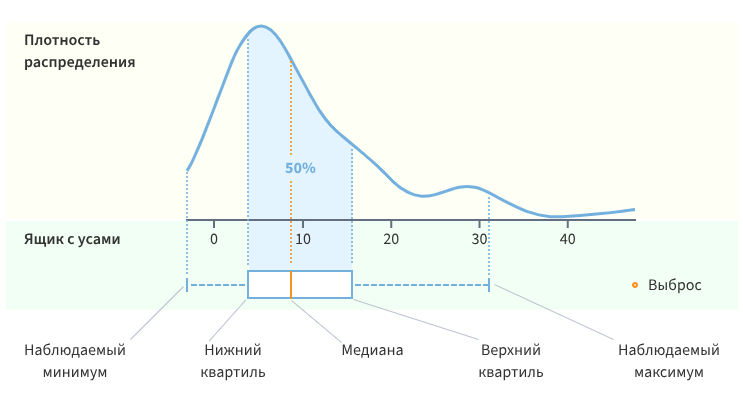


### 🔹 Пример

Пусть у нас есть данные о температуре (в °C):
```
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 35]
```

Заметно, что **35** — подозрительно высокое значение.

#### Шаг 1: Найдём квартили
- $Q_1 = 14$
- $Q_3 = 20$
- $\text{IQR} = 20 - 14 = 6$

#### Шаг 2: Вычислим границы
- Нижняя: $14 - 1.5 \times 6 = 14 - 9 = 5$
- Верхняя: $20 + 1.5 \times 6 = 20 + 9 = 29$

#### Шаг 3: Проверим значения
- Все значения от 12 до 21 попадают в интервал [5; 29] → **нормальные**.
- Значение **35 > 29** → **выброс**.

✅ Вывод: 35 — выброс по правилу 1.5 × IQR.



### 🔹 Визуализация: Box Plot

На диаграмме "ящик с усами":
- "Ящик" — от $Q_1$ до $Q_3$,
- "Усы" — до границ $Q_1 - 1.5 \times \text{IQR}$ и $Q_3 + 1.5 \times \text{IQR}$,
- Точки за пределами усов — **выбросы** (отображаются как отдельные кружки или звёздочки).



### 🔹 Когда использовать?

✅ **Подходит для**:
- Данных с неизвестным распределением,
- Наличия сильных выбросов,
- Быстрой диагностики аномалий.

❌ **Не подходит**, если:
- Данные **логически должны** иметь экстремальные значения (например, доходы),
- Нужна более точная модель (тогда лучше использовать Z-оценку, модели на основе плотности и т.д.).



```python
Q1 = df_out['Temperature'].quantile(0.25)
Q3 = df_out['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_out[(df_out['Temperature'] < lower_bound) | (df_out['Temperature'] > upper_bound)]
print("Обнаруженные выбросы:\n", outliers)
```

##### 3. Визуализация с выбросами

```python
plt.figure(figsize=(12, 5))
plt.plot(df_out.index, df_out['Temperature'], marker='o', label='С выбросом')
plt.axhline(upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.axhline(lower_bound, color='r', linestyle='--', label='Нижняя граница')
plt.scatter(outliers.index, outliers['Temperature'], color='red', s=100, label='Выброс', zorder=5)
plt.title('Обнаружение выбросов')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```

#### Обработка выбросов

##### Замена с помощью интерполяции

```python
df_clean = df_out.copy()
df_clean.loc[outliers.index, 'Temperature'] = np.nan
df_clean['Temperature'] = df_clean['Temperature'].interpolate(method='linear')
```

> **Альтернатива**: логарифмическое преобразование, Winsorization, удаление.



## 2. Дескриптивная Статистика


Дескриптивная статистика позволяет количественно охарактеризовать временной ряд, описывая его **центральную тенденцию**, **разброс**, **асимметрию** и **форму распределения**.

####Среднее значение (Mean)

Среднее значение — это мера центральной тенденции, отражающая **средний уровень** ряда.

$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

где:
- $X_i$ — значение $i$-го наблюдения,
- $N$ — общее количество наблюдений.

> **Пример**: Средняя дневная температура в январе.

> **Ограничение**: Чувствительно к выбросам.

---

####Выборочное стандартное отклонение (Sample Standard Deviation)

Мера разброса данных вокруг среднего значения. Чем больше стандартное отклонение, тем выше волатильность ряда.

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2}
$$

где:
- $X_i$ — значение $i$-го наблюдения,
- $\bar{X}$ — выборочное среднее,
- $n$ — количество наблюдений.

> **Примечание**: Деление на $n-1$ (а не на $n$) обеспечивает **несмещённую оценку** дисперсии генеральной совокупности.



####Коэффициент асимметрии (Skewness)

Асимметрия оценивает **направленность и степень скошенности** распределения.

$$
\gamma_1 = \frac{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^3}{s^3}
$$

- $\gamma_1 > 0$: **правосторонняя асимметрия** (хвост справа), например, распределение доходов.
- $\gamma_1 < 0$: **левосторонняя асимметрия** (хвост слева), например, время до отказа оборудования.
- $\gamma_1 \approx 0$: распределение симметрично.

> **Пример**: Положительная асимметрия в данных о продажах — редкие дни с очень высокими продажами.


####Коэффициент эксцесса (Kurtosis)

Эксцесс характеризует **"островершинность"** и **"тяжёлость хвостов"** распределения.

$$
\gamma_2 = \frac{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^4}{s^4} - 3
$$

- $\gamma_2 > 0$: **лептокуртическое** распределение (острый пик, тяжёлые хвосты, больше выбросов).
- $\gamma_2 < 0$: **платикуртическое** распределение (плоский пик, лёгкие хвосты).
- $\gamma_2 = 0$: распределение имеет такую же "островершинность", как нормальное.

> **Пример**: Финансовые доходности часто имеют положительный эксцесс — редкие, но сильные колебания («чёрные лебеди»).


```python
# Загрузим очищенные данные
data = df_clean['Temperature'].dropna()

# Основные статистики
stats = data.describe()
print("Описательная статистика:\n", stats)

# Дополнительные показатели
mean = data.mean()
std = data.std()
skew = data.skew()
kurt = data.kurtosis()  # pandas возвращает избыточный эксцесс (вычитает 3)

print(f"\nСреднее: {mean:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Асимметрия: {skew:.2f}")
print(f"Эксцесс (избыточный): {kurt:.2f}")
```

> **Интерпретация**:
> - Асимметрия близка к 0 → распределение симметрично.
> - Эксцесс > 0 → тяжёлые хвосты (возможны выбросы).

#### Визуализация распределения

```python
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', label=f'Среднее = {mean:.2f}')
plt.title('Гистограмма распределения температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```




## 3. Тесты на Стационарность

### 3. Тесты на Стационарность (Краткое Упоминание)

Стационарность — **ключевое требование** для большинства классических моделей временных рядов (AR, MA, ARIMA). Временной ряд называется **слабо стационарным**, если:
- Математическое ожидание $\mathbb{E}[Y_t] = \mu$ — постоянно,
- Дисперсия $\text{Var}(Y_t) = \sigma^2$ — постоянна,
- Ковариация $\text{Cov}(Y_t, Y_{t+k})$ зависит только от лага $k$, но не от $t$.

Нестационарные ряды часто содержат **тренд**, **сезонность** или **изменяющуюся дисперсию**, что делает их сложными для моделирования.

#### Пример теста: Расширенный тест Дики-Фуллера (ADF)

- **Нулевая гипотеза $H_0$**: ряд имеет **единичный корень** (нестационарен).
- **Альтернативная гипотеза $H_1$**: ряд **стационарен**.

Если p-значение теста < 0.05, нулевая гипотеза отвергается — ряд считается стационарным.

> **Пример**: Курс акций обычно нестационарен (растёт со временем), но его **приросты** (первые разности) могут быть стационарными.

> **Методы достижения стационарности**:
> - **Дифференцирование**: $\Delta Y_t = Y_t - Y_{t-1}$,
> - **Логарифмирование**,
> - **Удаление тренда** (детрендирование),
> - **Сезонное дифференцирование**.

Подробное рассмотрение тестов на стационарность (ADF, KPSS, PP) и методов преобразования будет дано в отдельном разделе.


### Пример: Нестационарный ряд с трендом

```python
# Генерация ряда с трендом
trend = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, 100)
series_with_trend = trend + noise
df_trend = pd.DataFrame({'Date': dates, 'Value': series_with_trend}).set_index('Date')
```

### Визуальная проверка

```python
plt.figure(figsize=(12, 5))
plt.plot(df_trend.index, df_trend['Value'], label='С трендом')
plt.title('Нестационарный временной ряд (с трендом)')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```

### Тест Дики-Фуллера (ADF)

```python
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF-статистика: {result[0]:.4f}')
    print(f'p-значение: {result[1]:.4f}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("✅ Ряд стационарен (H₀ отвергнута)")
    else:
        print("❌ Ряд нестационарен (H₀ не отвергнута)")

# Проверка ряда с трендом
adf_test(df_trend['Value'], "Ряд с трендом")
```

### Преобразование к стационарности

```python
# Первое дифференцирование
df_trend['diff'] = df_trend['Value'].diff()

# Удаление NaN
adf_test(df_trend['diff'].dropna(), "Первые разности")
```

> **Результат**: p < 0.05 → ряд стационарен после дифференцирования.

